In [ ]:
## 
# 자체 실습 코드 CNN(풀링, torch.nn.Conv2d, nn.Conv2d, nn.MaxPoold2d)

In [ ]:
# 필요한 모듈 임포트

import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
## MNIST 데이터를 탠서 형태로 바꾸고, 저장. 'mnist_train'

mnist_train = dset.MNIST('../', train = True, transform = transforms.ToTensor(), target_transform = None, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 84439805.03it/s]


Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 32837000.22it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27378283.87it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13220353.07it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [ ]:
print(mnist_train) ##위에 텐서 형태로 받아준 것, 확인.

Dataset MNIST
    Number of datapoints: 60000
    Root location: ../
    Split: Train
    StandardTransform
Transform: ToTensor()


In [ ]:
image,label = mnist_train.__getitem__(0) ## 1번째 데이터 받아오기. 1st 방법
print(image.size(),label)

print('\n')

image,label = mnist_train[0] ## 1번째 데이터 받아오기. 2nd방법. 5인 듯 하다.
print(image.size(), label)

torch.Size([1, 28, 28]) 5


torch.Size([1, 28, 28]) 5


In [ ]:
print(mnist_train.__len__()) ## mnist크기. 1번째 방법

print(len(mnist_train)) ## mnist 크기, 2번째 방법.

60000
60000


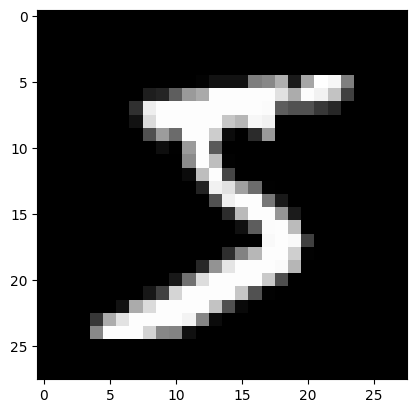

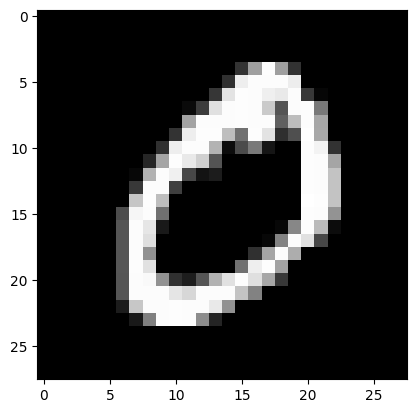

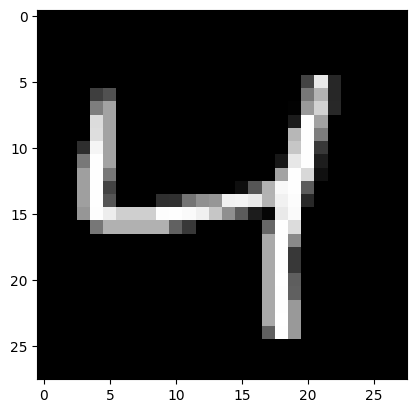

In [ ]:
for i in range(3):
    img = mnist_train[i][0].numpy()
    plt.imshow(img[0], cmap = 'gray')
    plt.show()

In [ ]:
## 이렇게 하면,
# 1. 패턴을 담지 못함. ->벡터 행렬로 바꿨을때, 형태 알아보기 참 힘듦
# 2. 메모리를 효율적으로 사용하지 못함
# -> 그래서 CNN이 생겨남.

torch.Size([1, 3, 28, 28])


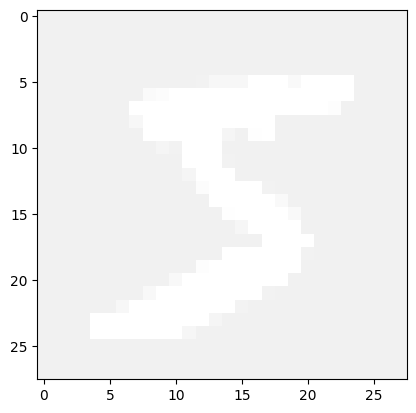

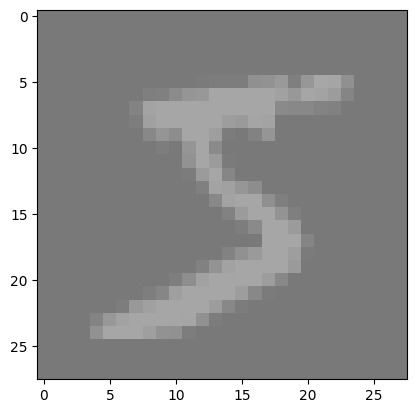

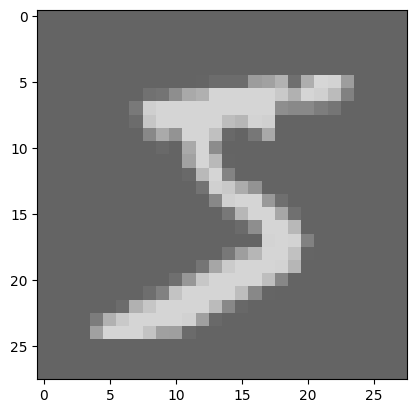

In [ ]:
image, label = mnist_train[0] #mnist첫번째 데이터 받아오기.

image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])

conv_layer = nn.Conv2d(in_channels = 1, out_channels = 3, kernel_size = 1) ## 1개의 입력, 3개의 출력. 커널 사이즈는 1

output = conv_layer(image)

print(output.size())

for i in range(output.size()[1]):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap = 'gray', vmin = -1, vmax= 1)
    plt.show()

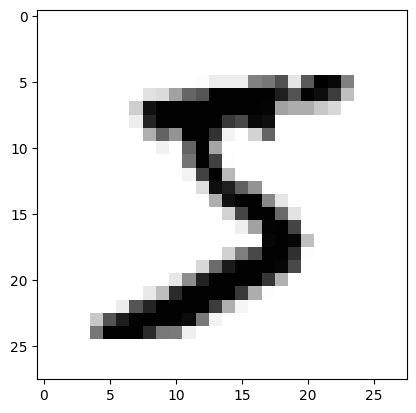

커널 사이즈 1인 경우: torch.Size([1, 1, 28, 28])


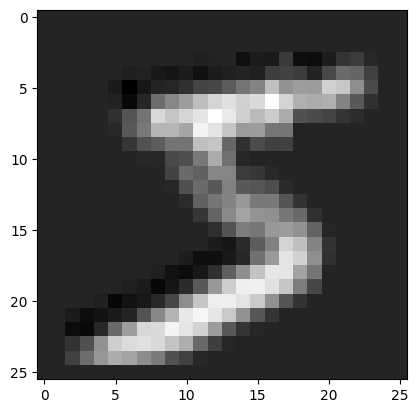

커널 사이즈 3인 경우: torch.Size([1, 1, 26, 26])


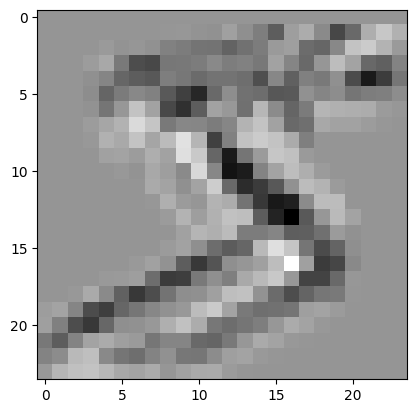

커널 사이즈 5인 경우: torch.Size([1, 1, 24, 24])


In [ ]:
# 커널 사이즈 1인 경우.

conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("커널 사이즈 1인 경우: {}".format(output.size()))

# 커널 사이즈 3인 경우.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("커널 사이즈 3인 경우: {}".format(output.size()))

# 커널 사이즈 5인 경우.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("커널 사이즈 5인 경우: {}".format(output.size()))

커널 사이즈를 작게 하는게 좀더 데이터 손실이 줄어드는게 보임.

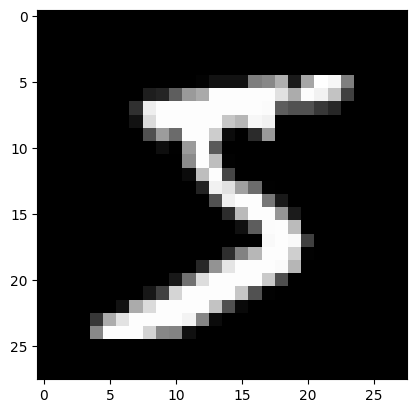

스트라이드 조절, 1로: torch.Size([1, 1, 28, 28])


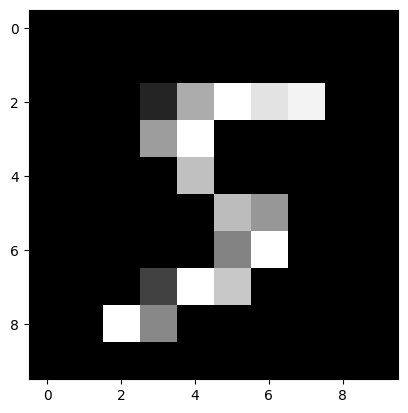

스트라이드 3으로: torch.Size([1, 1, 10, 10])
스트라이드 5로torch.Size([1, 1, 6, 6])


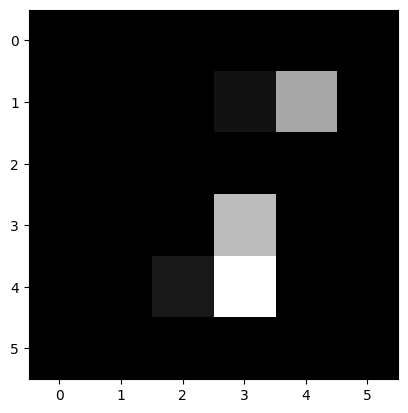

In [ ]:
# 스트라이드 1로 줬을 때.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, stride =1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("스트라이드 조절, 1로: {}".format(output.size()))

# 스트라이드 3으로 줬을 때.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, stride = 3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("스트라이드 3으로: {}".format(output.size()))

# 스트라이드 5로 줬을 때.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, stride = 5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
print("스트라이드 5로{}".format(output.size()))

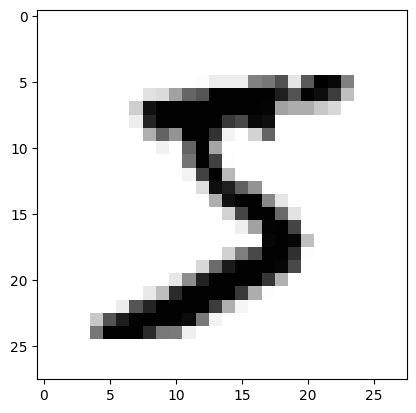

패딩 0일때: torch.Size([1, 1, 28, 28])


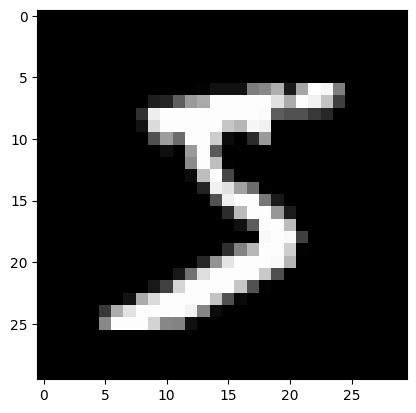

패딩 값 2로 줬을 때: torch.Size([1, 1, 30, 30])


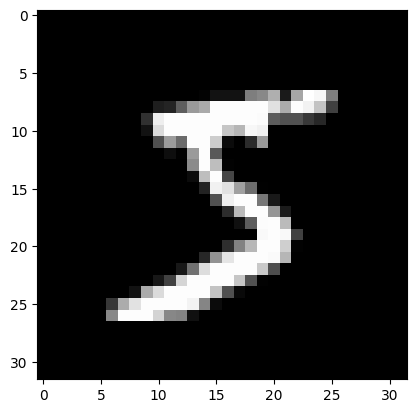

패딩 값 3으로 줬을 때: torch.Size([1, 1, 32, 32])


In [ ]:
#패딩값 0으로 줬을 때.
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, padding = 0)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("패딩 0일때: {}".format(output.size()))

#패딩값 1
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, padding = 1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("패딩 값 2로 줬을 때: {}".format(output.size()))

#패딩값 2
conv_layer = nn.Conv2d(in_channels = 1, out_channels = 1, kernel_size = 1, padding = 2)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(), cmap = 'gray')
plt.show()
print("패딩 값 3으로 줬을 때: {}".format(output.size()))

패딩값, 스트라이드 값, 커널 값 다 생각하면서 조정하기.